In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [2]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# Technically not necessary in newest versions of jupyter
%matplotlib inline

Using TensorFlow backend.


In [14]:
image_shape = (150,150,3)

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import optimizers

In [45]:

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=image_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9), metrics=['accuracy'])

In [46]:
image_gen = ImageDataGenerator(rotation_range=90, # rotate the image 30 degrees
                               #width_shift_range=0.1, # Shift the pic width by a max of 10%
                               #height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               #shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               #zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               #fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                               validation_split=0.2
                              )

In [47]:
batch_size = 30

train_image_gen = image_gen.flow_from_directory('../input/cnrpark/cnr-park/A/',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               subset='training')

Found 10068 images belonging to 2 classes.


In [48]:
test_image_gen = image_gen.flow_from_directory('../input/cnrpark/cnr-park/A',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               subset='validation')

Found 2516 images belonging to 2 classes.


In [49]:
train_image_gen.class_indices

{'busy': 0, 'free': 1}

In [51]:
# history = model.fit_generator(train_image_gen,epochs=10,
#                               steps_per_epoch=150,
#                               validation_data=test_image_gen,
#                              validation_steps=12)

history = model.fit_generator(train_image_gen,epochs=20,
                              steps_per_epoch=train_image_gen.samples/10,
                              validation_data=test_image_gen,
                             validation_steps=test_image_gen.samples/10)

Epoch 1/20
1007/1006 [==============================] - 213s 212ms/step - loss: 0.6372 - accuracy: 0.6622 - val_loss: 0.6065 - val_accuracy: 0.6677
Epoch 2/20
1007/1006 [==============================] - 215s 214ms/step - loss: 0.6009 - accuracy: 0.6680 - val_loss: 0.5946 - val_accuracy: 0.6663
Epoch 3/20
1007/1006 [==============================] - 210s 209ms/step - loss: 0.5135 - accuracy: 0.7229 - val_loss: 0.3601 - val_accuracy: 0.8751
Epoch 4/20
1007/1006 [==============================] - 212s 210ms/step - loss: 0.3931 - accuracy: 0.8351 - val_loss: 0.2214 - val_accuracy: 0.9238
Epoch 5/20
1007/1006 [==============================] - 208s 207ms/step - loss: 0.3165 - accuracy: 0.8763 - val_loss: 0.0756 - val_accuracy: 0.9539
Epoch 6/20
1007/1006 [==============================] - 212s 211ms/step - loss: 0.2767 - accuracy: 0.8931 - val_loss: 0.1579 - val_accuracy: 0.9629
Epoch 7/20
1007/1006 [==============================] - 210s 208ms/step - loss: 0.2572 - accuracy: 0.9008 - val_

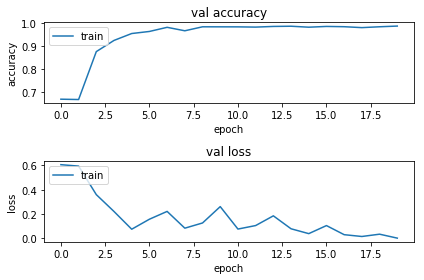

In [57]:
model.save('90valacc.h5')
plt.figure(1)
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['val_accuracy'])
plt.title('val accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['val_loss'])
plt.title('val loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.tight_layout()
plt.show()

In [34]:
from keras.preprocessing import image

![](http://)![](http://)

In [58]:
# Predicting on all the busy images 
free = 0
busy = 0
for dirname, _, filenames in os.walk('/kaggle/input/cnrpark/cnr-park/A/busy/'):
    for filename in filenames:
        filepath = os.path.join(dirname, filename);
        img = image.load_img(filepath, target_size=image_shape)
        img = image.img_to_array(img)
        img = img.reshape((-1, 150, 150, 3))

        img.shape
        for text, index in train_image_gen.class_indices.items():    # for name, age in dictionary.iteritems():  (for Python 2.x)
            if index == model.predict(img)[0]:
                if (text == "free"):
                    free += 1
                else:
                    busy += 1
print("busy: ", busy)
print("free: ", free)
        

busy:  8172
free:  209


In [ ]:
# Predicting on all the free images 
free = 0
busy = 0
for dirname, _, filenames in os.walk('/kaggle/input/cnrpark/cnr-park/A/free/'):
    for filename in filenames:
        filepath = os.path.join(dirname, filename);
        img = image.load_img(filepath, target_size=image_shape)
        img = image.img_to_array(img)
        img = img.reshape((-1, 150, 150, 3))

        img.shape
        for text, index in train_image_gen.class_indices.items():    # for name, age in dictionary.iteritems():  (for Python 2.x)
            if index == model.predict(img)[0]:
                if (text == "free"):
                    free += 1
                else:
                    busy += 1
print("busy: ", busy)
print("free: ", free)
        